In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [457]:
ss13 = pd.read_csv('../capstone_stuff/stats_salary_2013.csv')
ss14 = pd.read_csv('../capstone_stuff/stats_salary_2014.csv')
ss15 = pd.read_csv('../capstone_stuff/stats_salary_2015.csv')
ss16 = pd.read_csv('../capstone_stuff/stats_salary_2016.csv')
ss17 = pd.read_csv('../capstone_stuff/stats_salary_2017.csv')

In [458]:
ss13 = ss13[ss13.Salary.notnull()]
ss14 = ss14[ss14.Salary.notnull()]
ss15 = ss15[ss15.Salary.notnull()]
ss16 = ss16[ss16.Salary.notnull()]
ss17 = ss17[ss17.Salary.notnull()]

In [459]:
#replacing spaces with underscores in player names
for df in [ss13, ss14, ss15, ss16, ss17]:
    df.Player = df.Player.map(lambda x: x.replace(' ','_').lower())

In [460]:
#dropping extra column
for df in [ss13, ss14, ss15, ss16, ss17]:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [461]:
# just checking column lengths
for df in [ss13, ss14, ss15, ss16, ss17]:
    print len(df.columns)

61
61
61
61
61


In [462]:
#creating a column for year of stats
for df, yr in zip([ss13, ss14, ss15, ss16, ss17], ['13','14','15','16','17']):
    df['Year'] = yr


In [463]:
#renaming team columns so that they are uniform
ss15.rename(columns={'Team_x':'Team'}, inplace=True)
ss16.rename(columns={'Team_y_y':'Team'}, inplace=True)
ss17.rename(columns={'Team_y':'Team'}, inplace=True)

In [464]:
#fixing column order to be consistent
column_order = list(ss13.columns)
ss13 = ss13[column_order]
ss14 = ss14[column_order]
ss15 = ss15[column_order]
ss16 = ss16[column_order]
ss17 = ss17[column_order]


In [465]:
#combining 5 years of data
seasons = pd.concat([ss13, ss14, ss15, ss16, ss17], axis=0)

In [466]:
#checking null values
seasons.isnull().sum()

3P%            0
3PA            0
3PM            0
AST            0
BLK            0
DRB            0
FG%            0
FGA            0
FGM            0
FT%            0
FTA            0
FTM            0
GP             0
MIN            0
ORB            0
PF             0
PTS            0
Player         0
REB            0
STL            0
TOV            0
Team         519
AST%          76
BLK%          76
DRB%          76
Drtg          76
FIC           76
ORB%          76
Ortg          76
PER           76
            ... 
STL%          76
TOV%          76
TRB%          76
TS%           76
TotalS%       76
USG%          76
eDiff         76
eFG%          76
20ast        911
20reb        911
40pts        911
5blk         911
5stl         911
ASTtoTOV     911
DBLDBL       911
DWS          911
FTtoFGA      911
HOB          911
OWS          911
STLtoTOV     911
TRPLDBL      911
WS           911
high_game    911
losses       911
techs        911
win%         911
wins         911
Salary        

In [467]:
#dropping some columns
#ended up redoing these columns on my own
seasons.drop(['ASTtoTOV', 'FTtoFGA', 'STLtoTOV'], axis=1, inplace=True)

In [468]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 452
Data columns (total 59 columns):
3P%          1890 non-null float64
3PA          1890 non-null float64
3PM          1890 non-null float64
AST          1890 non-null float64
BLK          1890 non-null float64
DRB          1890 non-null float64
FG%          1890 non-null float64
FGA          1890 non-null float64
FGM          1890 non-null float64
FT%          1890 non-null float64
FTA          1890 non-null float64
FTM          1890 non-null float64
GP           1890 non-null int64
MIN          1890 non-null float64
ORB          1890 non-null float64
PF           1890 non-null float64
PTS          1890 non-null float64
Player       1890 non-null object
REB          1890 non-null float64
STL          1890 non-null float64
TOV          1890 non-null float64
Team         1371 non-null object
AST%         1814 non-null object
BLK%         1814 non-null object
DRB%         1814 non-null object
Drtg         1814 non-null

In [469]:
#creating a function to replace null values with 0
def fillzeros(x):
    if pd.isnull(x):
        return 0.0
    else:
        return x

In [470]:
seasons['20ast'] = seasons['20ast'].map(fillzeros)

In [471]:
seasons['20reb'] = seasons['20reb'].map(fillzeros)

In [472]:
seasons['40pts'] = seasons['40pts'].map(fillzeros)

In [473]:
seasons['5blk'] = seasons['5blk'].map(fillzeros)

In [474]:
seasons['5stl'] = seasons['5stl'].map(fillzeros)

In [475]:
seasons['DBLDBL'] = seasons['DBLDBL'].map(fillzeros)

In [476]:
seasons['TRPLDBL'] = seasons['TRPLDBL'].map(fillzeros)

In [477]:
seasons['techs'] = seasons['techs'].map(fillzeros)

In [478]:
#making year categorical
seasons.Year = seasons.Year.map(lambda x: str(x))

In [479]:
#making position categorical
seasons.Position = seasons.Position.map(lambda x: str(x))

In [480]:
seasons = seasons.reset_index()

In [481]:
seasons.drop('index', inplace=True, axis=1)

In [482]:
seasons['AST%'] = seasons['AST%'].replace('-', 0)

In [483]:
seasons['BLK%'] = seasons['BLK%'].replace('-', 0)
seasons['BLK%'] = seasons['BLK%'].map(fillzeros)

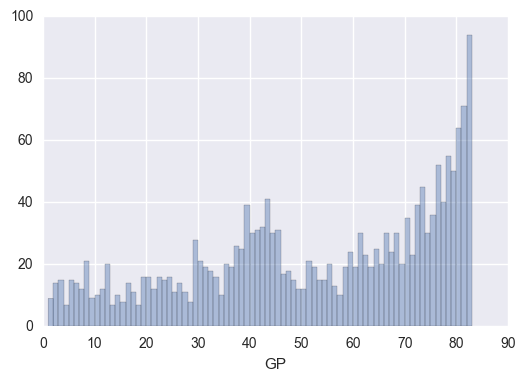

In [484]:
sns.distplot(seasons['GP'], kde=False, bins=82)

In [485]:
seasons.Salary.dropna()

0       19444503.0
1       17832626.0
2       30453805.0
3       19067500.0
4        5820417.0
5       14693906.0
6        3958742.0
7        5375760.0
8       18673000.0
9       13500000.0
10      12500000.0
11      11000000.0
12       3065040.0
13      17177795.0
14      16790345.0
15       7459925.0
16      12744000.0
17      13668750.0
18      16460538.0
19       3344250.0
20       2806452.0
21      13701250.0
22      13500000.0
23       9638554.0
24       2568360.0
25       2674852.0
26       3179493.0
27      13200000.0
28       2574120.0
29      20907128.0
           ...    
1860     1733880.0
1861     4000000.0
1862     3500000.0
1863     1050961.0
1864      543471.0
1865     1704120.0
1866      874636.0
1867      980431.0
1868      650000.0
1869      543471.0
1870     3750000.0
1871     1825200.0
1872      950000.0
1873      980431.0
1874      979848.0
1875     1052342.0
1876    15944154.0
1877      980431.0
1878      680534.0
1879      600000.0
1880       57672.0
1881      65

In [486]:
seasons[seasons['GP'] > 12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1881
Data columns (total 59 columns):
3P%          1732 non-null float64
3PA          1732 non-null float64
3PM          1732 non-null float64
AST          1732 non-null float64
BLK          1732 non-null float64
DRB          1732 non-null float64
FG%          1732 non-null float64
FGA          1732 non-null float64
FGM          1732 non-null float64
FT%          1732 non-null float64
FTA          1732 non-null float64
FTM          1732 non-null float64
GP           1732 non-null int64
MIN          1732 non-null float64
ORB          1732 non-null float64
PF           1732 non-null float64
PTS          1732 non-null float64
Player       1732 non-null object
REB          1732 non-null float64
STL          1732 non-null float64
TOV          1732 non-null float64
Team         1289 non-null object
AST%         1664 non-null object
BLK%         1732 non-null object
DRB%         1664 non-null object
Drtg         1664 non-nul

In [487]:
#replacing nan values in team with 'other'
seasons.Team.replace(np.nan, 'other', inplace=True)

In [488]:
seasons.PER = seasons.PER.map(fillzeros)

In [489]:
seasons['win%'].isnull().sum()

911

In [490]:
seasons.drop(['WS', 'DWS', 'OWS'], axis=1, inplace=True)

In [491]:
seasons['DRB%'] = seasons['DRB%'].map(fillzeros)

In [492]:
seasons['Drtg'] = seasons['Drtg'].map(fillzeros)

In [493]:
seasons['FIC'] = seasons['FIC'].map(fillzeros)

In [494]:
seasons['ORB%'] = seasons['ORB%'].map(fillzeros)

In [495]:
seasons['Ortg'] = seasons['Ortg'].map(fillzeros)

In [496]:
seasons['AST%'] = seasons['AST%'].map(fillzeros)

In [497]:
seasons['PPR'] = seasons['PPR'].map(fillzeros)

In [498]:
seasons['PER'] = seasons['PER'].map(fillzeros)

In [499]:
seasons['PPS'] = seasons['PPS'].map(fillzeros)

In [500]:
seasons['STL%'] = seasons['STL%'].map(fillzeros)

In [501]:
seasons['TOV%'] = seasons['TOV%'].map(fillzeros)

In [502]:
seasons['TRB%'] = seasons['TRB%'].map(fillzeros)

In [503]:
seasons['TS%'] = seasons['TS%'].map(fillzeros)

In [504]:
seasons['TotalS%'] = seasons['TotalS%'].map(fillzeros)

In [505]:
seasons['USG%'] = seasons['USG%'].map(fillzeros)

In [506]:
seasons['eFG%'] = seasons['eFG%'].map(fillzeros)

In [507]:
#creating function to replace dash values with 0
def filldash(x):
    if x is "-":
        return 0.0
    else:
        return x

In [508]:
seasons['ORB%'] = seasons['ORB%'].map(filldash)

In [509]:
seasons['Ortg'] = seasons['Ortg'].map(filldash)

In [510]:
seasons['eDiff'] = seasons['eDiff'].map(filldash)

In [511]:
seasons = seasons.apply(filldash)

In [512]:
seasons.eDiff = seasons.eDiff.map(fillzeros)

In [513]:
#recreating columns from earlier
seasons['ASTtoTOV'] = seasons['AST'] / seasons['TOV']

In [514]:
#using backfill to replace null values in HOB column
seasons['HOB'] = seasons.groupby('Player')[['HOB']].bfill().dropna()

In [515]:
#using backfill to replace null values with backfill
seasons['high_game'] = seasons.groupby('Player')[['high_game']].bfill().dropna()

In [516]:
seasons['ASTtoTOV'] = seasons['ASTtoTOV'].map(fillzeros)

In [517]:
seasons['STLtoTOV'] = seasons['STL'] / seasons['TOV']

In [518]:
seasons['STLtoTOV'] = seasons['STLtoTOV'].map(fillzeros)

In [519]:
seasons['FTAtoFGA'] = seasons['FTA'] / seasons['FGA']

In [520]:
seasons.FTAtoFGA = seasons.FTAtoFGA.map(fillzeros)

In [521]:
#dropping problematic columns
seasons.drop(['win%', 'wins', 'losses'], axis=1, inplace=True)

In [522]:
seasons.HOB = seasons.HOB.map(fillzeros)

In [523]:
seasons.high_game = seasons.high_game.map(fillzeros)

In [524]:
#tried making seasons dataframe into numeric values
seasons = seasons.apply(lambda x: pd.to_numeric(x, errors='ignore'))

In [525]:
seasons = seasons.apply(filldash)

In [526]:
seasons['TOV%'] = seasons['TOV%'].map(filldash)

In [527]:
seasons['USG%'] = seasons['USG%'].map(filldash)

In [528]:
seasons['USG%'] = seasons['USG%'].map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [529]:
seasons['TOV%'] = seasons['TOV%'].map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [530]:
seasons['STL%'] = seasons['STL%'].map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [531]:
seasons['STL%'] = seasons['STL%'].map(filldash)

In [532]:
seasons['TRB%'] = seasons['TRB%'].map(filldash)

In [533]:
seasons['TRB%'] = seasons['TRB%'].map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [534]:
seasons.PER = seasons.PER.map(filldash)

In [535]:
seasons.PER = seasons.PER.map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [536]:
seasons.PPR = seasons.PPR.map(filldash)

In [537]:
seasons.PPR = seasons.PPR.map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [538]:
seasons.FIC = seasons.FIC.map(filldash)

In [539]:
seasons.FIC = seasons.FIC.map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [540]:
seasons['DRB%'] = seasons['DRB%'].map(filldash)

In [541]:
seasons['DRB%'] = seasons['DRB%'].map(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [542]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 56 columns):
3P%          1890 non-null float64
3PA          1890 non-null float64
3PM          1890 non-null float64
AST          1890 non-null float64
BLK          1890 non-null float64
DRB          1890 non-null float64
FG%          1890 non-null float64
FGA          1890 non-null float64
FGM          1890 non-null float64
FT%          1890 non-null float64
FTA          1890 non-null float64
FTM          1890 non-null float64
GP           1890 non-null int64
MIN          1890 non-null float64
ORB          1890 non-null float64
PF           1890 non-null float64
PTS          1890 non-null float64
Player       1890 non-null object
REB          1890 non-null float64
STL          1890 non-null float64
TOV          1890 non-null float64
Team         1890 non-null object
AST%         1890 non-null float64
BLK%         1890 non-null float64
DRB%         1890 non-null float64
Drtg         1890 non-

In [543]:
#saving csv
seasons.to_csv('../capstone_stuff/five_years.csv')

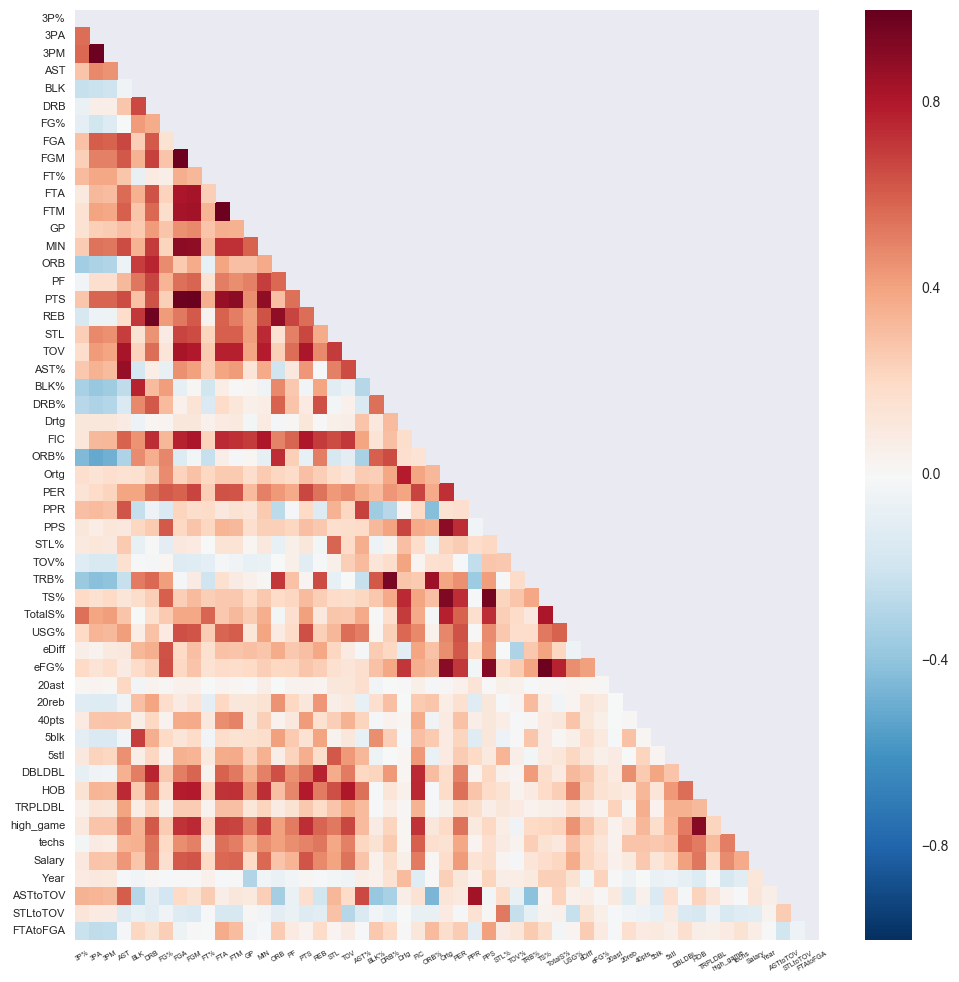

In [544]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(seasons)

In [545]:
seasons.groupby('Player').agg(np.mean)

,3P%,3PA,3PM,AST,BLK,DRB,FG%,FGA,FGM,FT%,...,DBLDBL,HOB,TRPLDBL,high_game,techs,Salary,Year,ASTtoTOV,STLtoTOV,FTAtoFGA
Player,,,,,,,,,,,,,,,,,,,,,
a.j._hammons,0.667000,0.400000,0.200000,0.100000,0.400000,0.900000,0.409000,1.300000,0.500000,0.200000,...,0.000000,0.000000,0.0,0.000000,0.000000,6.500000e+05,17.000000,0.500000,0.000000,0.461538
a.j._price,0.263000,2.200000,0.600000,1.800000,0.000000,1.000000,0.372000,5.300000,2.000000,0.667000,...,0.000000,0.000000,0.0,0.000000,0.000000,5.383800e+04,15.000000,3.600000,0.600000,0.169811
aaron_brooks,0.360667,2.466667,0.900000,2.400000,0.166667,1.100000,0.426000,5.966667,2.500000,0.773667,...,0.000000,0.000000,0.0,0.000000,0.000000,2.450000e+06,15.333333,1.952991,0.431624,0.145425
aaron_gordon,0.290667,2.133333,0.633333,1.433333,0.566667,3.500000,0.453000,7.366667,3.333333,0.668667,...,5.000000,0.123000,0.0,24.000000,0.666667,4.171680e+06,16.000000,1.564394,0.742424,0.285531
aaron_gray,0.000000,0.000000,0.000000,0.700000,0.150000,1.950000,0.488000,1.850000,0.900000,0.536500,...,0.500000,0.026000,0.0,11.000000,0.500000,2.632938e+06,13.500000,0.875000,0.312500,0.394345
aaron_harrison,0.150000,0.450000,0.050000,0.350000,0.000000,0.550000,0.131500,0.850000,0.100000,0.458500,...,0.000000,0.000000,0.0,0.000000,0.000000,6.998645e+05,16.500000,inf,0.750000,0.583333
adreian_payne,0.197333,0.633333,0.133333,0.633333,0.300000,2.200000,0.408000,4.500000,1.833333,0.702000,...,1.000000,0.035333,0.0,5.333333,0.000000,1.938800e+06,16.000000,0.690476,0.476190,0.258736
al-farouq_aminu,0.275600,2.020000,0.640000,1.460000,0.660000,4.880000,0.426800,6.680000,2.820000,0.710000,...,5.800000,0.113400,0.0,19.600000,1.600000,4.680469e+06,15.000000,1.183117,0.861818,0.271400
al_harrington,0.267000,3.000000,0.800000,1.000000,0.100000,2.100000,0.351000,5.700000,2.000000,0.750000,...,0.000000,0.000000,0.0,0.000000,0.000000,7.148600e+06,13.000000,1.428571,0.571429,0.070175


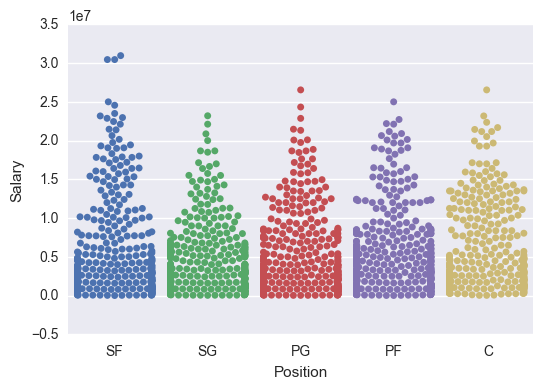

In [546]:
sns.swarmplot(seasons.Position, seasons.Salary)

In [547]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 56 columns):
3P%          1890 non-null float64
3PA          1890 non-null float64
3PM          1890 non-null float64
AST          1890 non-null float64
BLK          1890 non-null float64
DRB          1890 non-null float64
FG%          1890 non-null float64
FGA          1890 non-null float64
FGM          1890 non-null float64
FT%          1890 non-null float64
FTA          1890 non-null float64
FTM          1890 non-null float64
GP           1890 non-null int64
MIN          1890 non-null float64
ORB          1890 non-null float64
PF           1890 non-null float64
PTS          1890 non-null float64
Player       1890 non-null object
REB          1890 non-null float64
STL          1890 non-null float64
TOV          1890 non-null float64
Team         1890 non-null object
AST%         1890 non-null float64
BLK%         1890 non-null float64
DRB%         1890 non-null float64
Drtg         1890 non-

In [548]:
cols = seasons.columns.tolist()

In [549]:
#bringing salary column to front of dataframe
cols = cols[50:] + cols[:50]

In [550]:
seasons = seasons[cols]

In [551]:
print "columns:", len(seasons.columns)

columns: 56


In [722]:
#dropping categorical values in df so I can start a model
seasons = seasons.drop(['Player', 'Team', 'Position'], axis=1)

ValueError: labels ['Player' 'Team' 'Position'] not contained in axis

In [723]:
seasons = seasons.drop('Year', axis=1)

In [724]:
#creating a mask to find inf values
mask = ((seasons.ASTtoTOV == np.inf) | (seasons.STLtoTOV == np.inf) | (seasons.FTAtoFGA == np.inf))

In [725]:
#using mask on df to get rid of all 'inf' values
filtered_df = seasons[~mask]

In [726]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 0 to 1889
Data columns (total 52 columns):
Salary       1863 non-null float64
ASTtoTOV     1863 non-null float64
STLtoTOV     1863 non-null float64
FTAtoFGA     1863 non-null float64
3P%          1863 non-null float64
3PA          1863 non-null float64
3PM          1863 non-null float64
AST          1863 non-null float64
BLK          1863 non-null float64
DRB          1863 non-null float64
FG%          1863 non-null float64
FGA          1863 non-null float64
FGM          1863 non-null float64
FT%          1863 non-null float64
FTA          1863 non-null float64
FTM          1863 non-null float64
GP           1863 non-null int64
MIN          1863 non-null float64
ORB          1863 non-null float64
PF           1863 non-null float64
PTS          1863 non-null float64
REB          1863 non-null float64
STL          1863 non-null float64
TOV          1863 non-null float64
AST%         1863 non-null float64
BLK%         1863 no

In [727]:
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

In [728]:
#salary is target
#everything else is predictors
y = filtered_df.Salary.values
X = filtered_df.iloc[:,1:]

In [729]:
#splitting data 50:50
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)

In [730]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xtrain = ss.fit_transform(Xtrain)

# Normalization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.

In [731]:
Xtrain.shape

(931, 51)

In [732]:
ytrain.shape

(931,)

In [733]:
ytrain = np.reshape(ytrain, (931,1))

In [734]:
ytrain.shape

(931, 1)

In [735]:
#cross validating my linear regression on training data
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xtrain, ytrain, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[ 0.55470746  0.54406005  0.5211982   0.27706597  0.48163444  0.42340174
  0.36078999  0.37483971  0.48621736  0.44678263]
0.447069755044


In [736]:
#cross validating my linear regression on training data
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xtest, ytest, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[ 0.4446235   0.4516501   0.35219464  0.45206725  0.51933078  0.189897
  0.173566    0.31894153  0.27942256  0.50918425]
0.36908776173


In [737]:
#finding optimal ridge alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)

print optimal_ridge.alpha_

19.1164407539


In [738]:
#finding optimal ridge alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtest, ytest)

print optimal_ridge.alpha_

76.6341086801


In [739]:
#cross validating using ridge on training data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.54381653  0.54827678  0.55809087  0.22971414  0.55530958  0.46983705
  0.41609346  0.40759227  0.47252754  0.43639492]
0.463765313774


In [569]:
#cross validating using ridge on test data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xtest, ytest, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.39070386  0.24910167  0.5236421   0.44302485  0.59220874  0.42695857
  0.60920321  0.51715123  0.40758365  0.31017622]
0.446975409209


In [570]:
#finding optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

33262.97187


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [571]:
#finding optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtest, ytest)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

874319.933948


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [572]:
#cross validating using lasso on training data
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.32582271  0.41940689  0.4616635   0.41772812  0.48524344  0.31892063
  0.35398036  0.14569265  0.39722994  0.46472563]
0.379041387319


In [573]:
#cross validating using lasso on training data
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xtest, ytest, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.33358621  0.29722499  0.45663069  0.39606133  0.50505742  0.39380119
  0.53048367  0.46907322  0.37837682  0.34573753]
0.410603306549


In [574]:
#fitting training data using lasso
lasso.fit(Xtrain, ytrain)

Lasso(alpha=874319.9339482052, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [575]:
lasso.fit(Xtest, ytest)

Lasso(alpha=874319.9339482052, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [576]:
#creating df to look at coefs
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,abs_coef,coef,variable
20,252593.731073,252593.731073,PTS
17,182991.345657,182991.345657,MIN
16,63786.179068,-63786.179068,GP
26,23776.181656,23776.181656,DRB%
27,17420.063023,-17420.063023,Drtg
24,8995.577254,8995.577254,AST%
50,6495.707364,6495.707364,high_game
28,2972.378892,2972.378892,FIC
44,0.000000,0.000000,40pts
35,0.000000,0.000000,TOV%


In [577]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(Xtrain.shape[1])

Percent variables zeroed out: 0.846153846154


In [578]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(Xtest.shape[1])

Percent variables zeroed out: 0.846153846154


In [579]:
#finding optimal enet alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

103981.895708
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.6s finished


In [580]:
#finding optimal enet alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtest, ytest)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

874319.933948
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.6s finished


In [581]:
#cross validating enet with training data
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)

print enet_scores
print np.mean(enet_scores)

[ 0.32582271  0.41940689  0.4616635   0.41772812  0.48524344  0.31892063
  0.35398036  0.14569265  0.39722994  0.46472563]
0.379041387319


In [582]:
#cross validating enet with training data
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xtest, ytest, cv=10)

print enet_scores
print np.mean(enet_scores)

[ 0.33358621  0.29722499  0.45663069  0.39606133  0.50505742  0.39380119
  0.53048367  0.46907322  0.37837682  0.34573753]
0.410603306549


In [583]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xtrain, ytrain)
enet.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=874319.9339482052, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [584]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xtest, ytest)
enet.fit(Xtest, ytest)
lasso.fit(Xtest, ytest)

Lasso(alpha=874319.9339482052, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [585]:
enet.predict(Xtrain).shape

(931,)

In [586]:
#training
# model residuals:

ridge_resid = ytrain - ridge.predict(Xtrain)
lasso_resid = ytrain.ravel() - lasso.predict(Xtrain)
enet_resid = ytrain.ravel() - enet.predict(Xtrain)

In [587]:
#testing
# model residuals:

ridge_resid = ytest - ridge.predict(Xtest)
lasso_resid = ytest.ravel() - lasso.predict(Xtest)
enet_resid = ytest.ravel() - enet.predict(Xtest)

In [588]:
print ridge_resid.shape
print lasso_resid.shape
print enet_resid.shape

(932,)
(932,)
(932,)


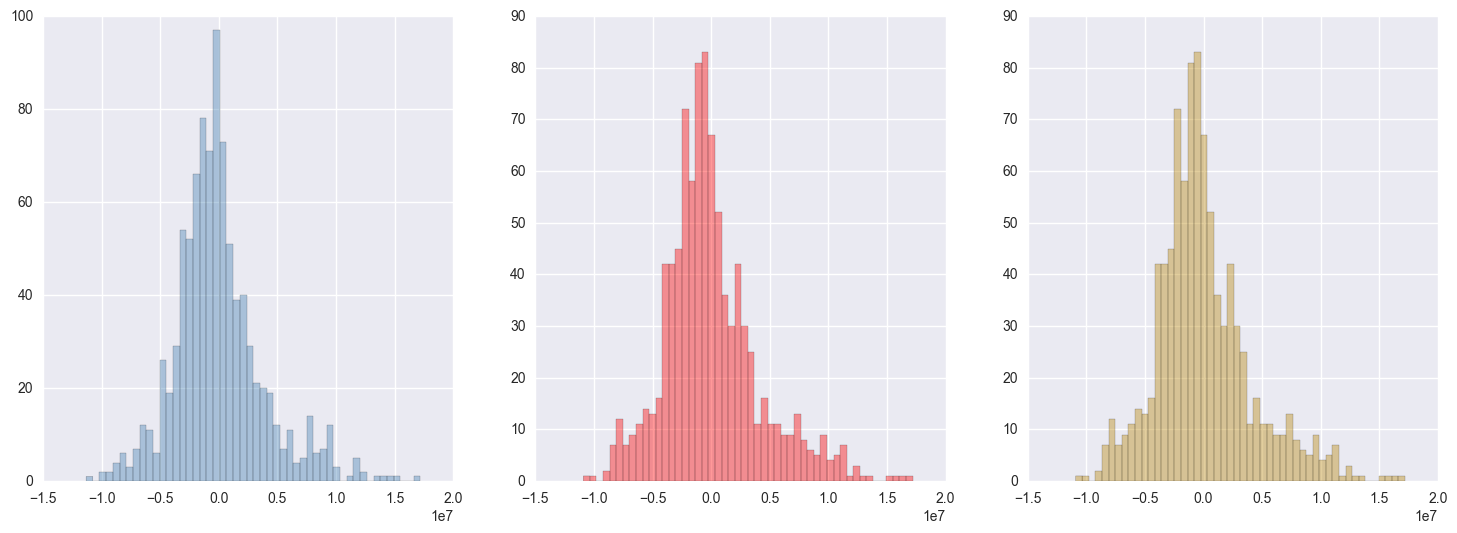

In [589]:
#training
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='red', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()

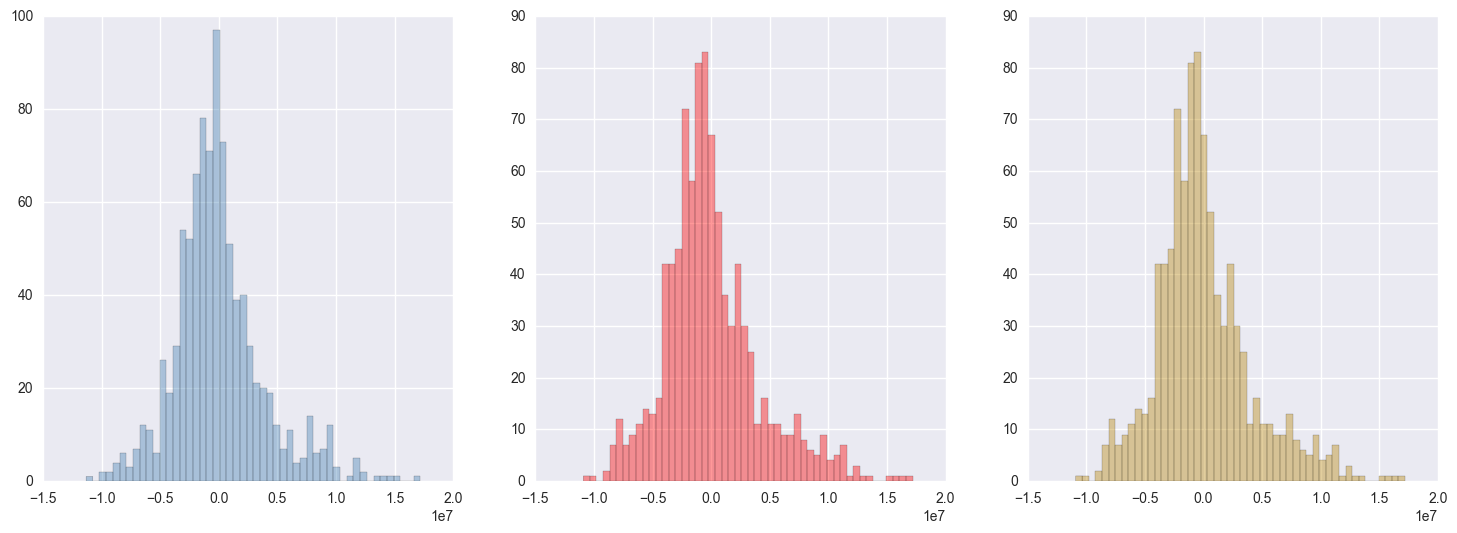

In [590]:
#testing
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='red', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()

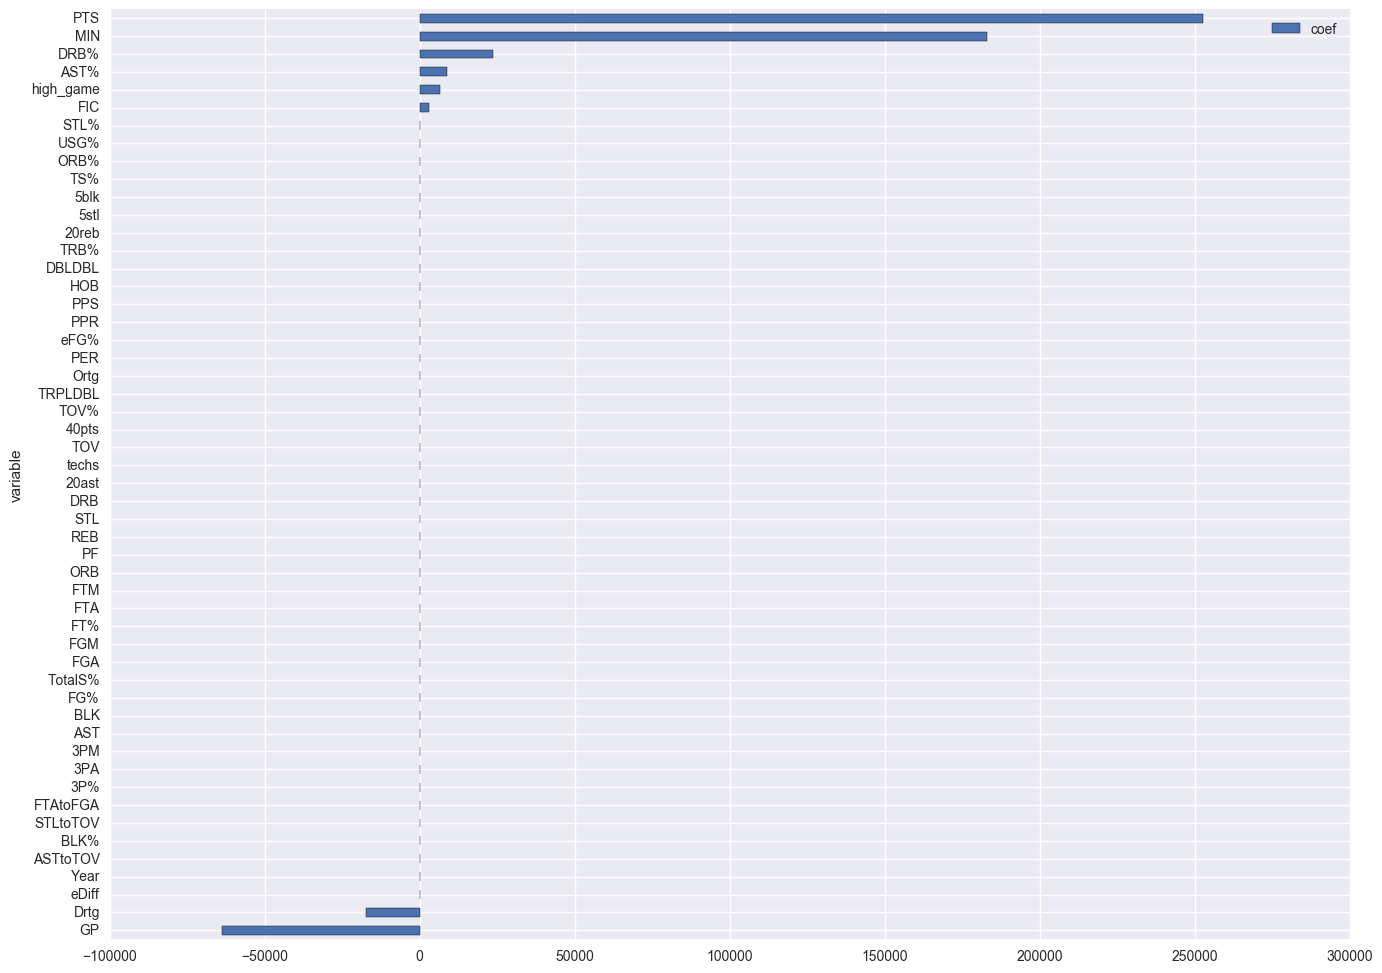

In [591]:
#training
lasso_coefs.sort_values(by='coef').plot(kind='barh', x = 'variable', y = 'coef',figsize=(16,12))

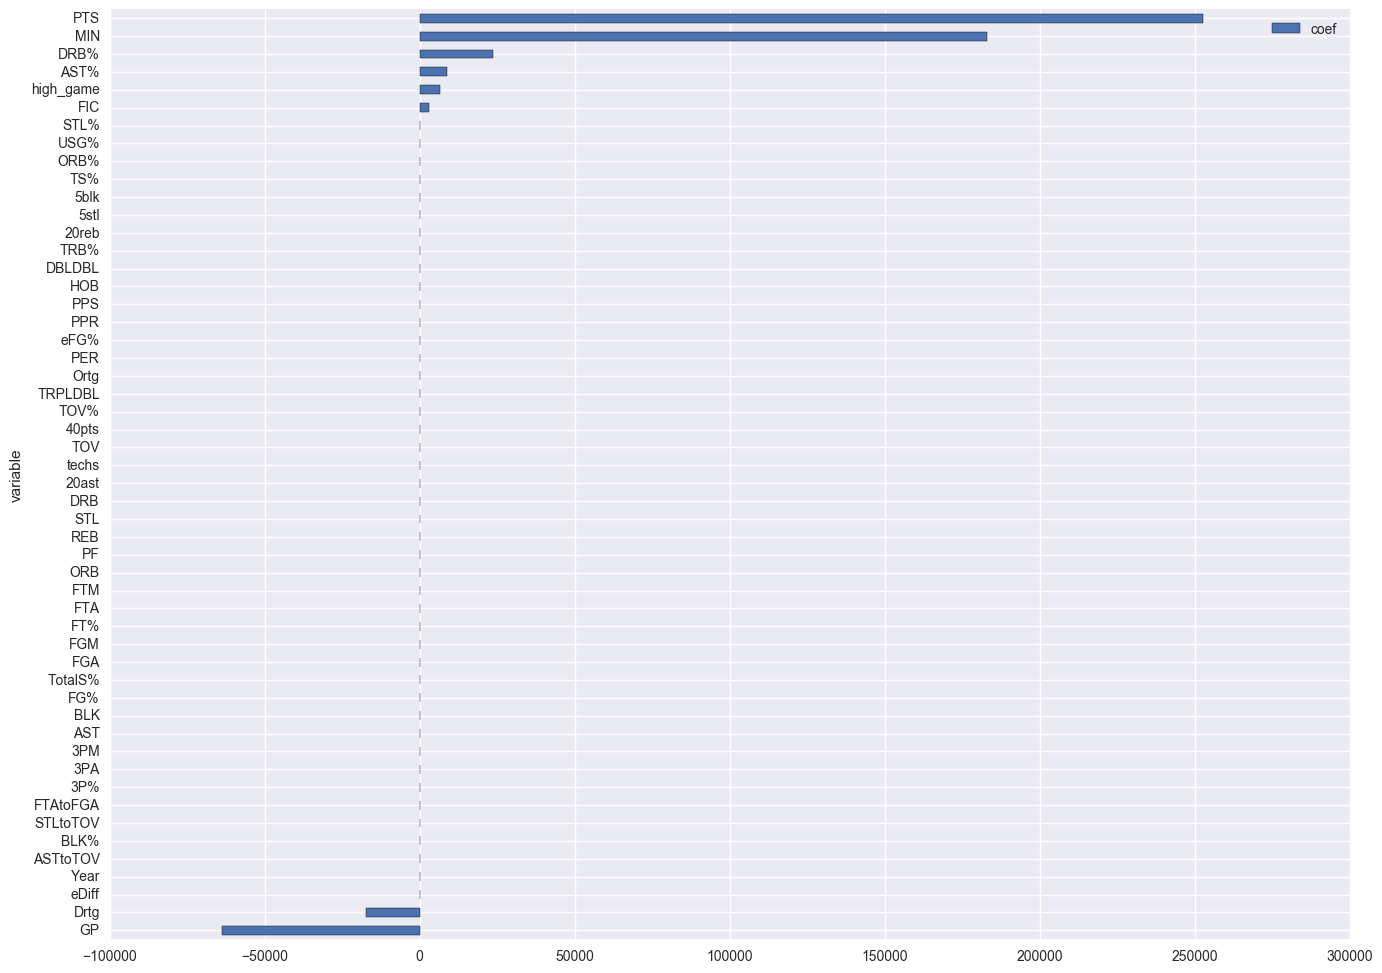

In [592]:
#testing
lasso_coefs.sort_values(by='coef').plot(kind='barh', x = 'variable', y = 'coef',figsize=(16,12))

- start with regression and lasso
- find whats important and not important
- try to combine variables
- PCA on columns to get combined feature columns
- More EDA
- Consistancy variable (variance)


In [593]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 0 to 1889
Data columns (total 53 columns):
Salary       1863 non-null float64
Year         1863 non-null int64
ASTtoTOV     1863 non-null float64
STLtoTOV     1863 non-null float64
FTAtoFGA     1863 non-null float64
3P%          1863 non-null float64
3PA          1863 non-null float64
3PM          1863 non-null float64
AST          1863 non-null float64
BLK          1863 non-null float64
DRB          1863 non-null float64
FG%          1863 non-null float64
FGA          1863 non-null float64
FGM          1863 non-null float64
FT%          1863 non-null float64
FTA          1863 non-null float64
FTM          1863 non-null float64
GP           1863 non-null int64
MIN          1863 non-null float64
ORB          1863 non-null float64
PF           1863 non-null float64
PTS          1863 non-null float64
REB          1863 non-null float64
STL          1863 non-null float64
TOV          1863 non-null float64
AST%         1863 non-

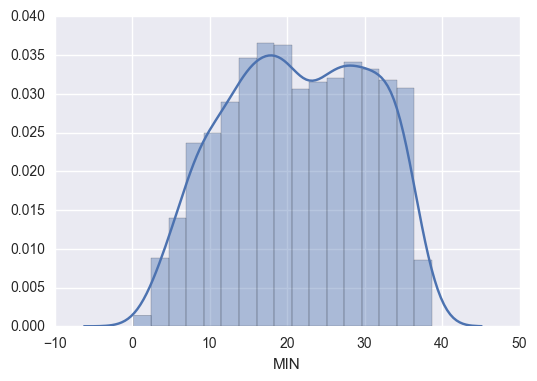

In [594]:
sns.distplot(filtered_df.MIN)

In [740]:
filtered_df.describe()

,Salary,ASTtoTOV,STLtoTOV,FTAtoFGA,3P%,3PA,3PM,AST,BLK,DRB,...,20ast,20reb,40pts,5blk,5stl,DBLDBL,HOB,TRPLDBL,high_game,techs
count,1.863000e+03,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,...,1863.000000,1863.000000,1863.00000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,5.160302e+06,1.479012,0.623394,0.278437,0.265896,2.015405,0.708588,1.964037,0.434407,2.879979,...,0.003757,0.099302,0.12131,0.271605,0.272678,4.597424,0.111160,0.119163,16.387547,1.404187
std,5.307803e+06,0.800857,0.380904,0.168886,0.165494,1.883390,0.724611,1.852401,0.449397,1.771508,...,0.076769,0.655731,0.80432,1.223773,0.888366,9.098284,0.114045,0.744311,14.692922,2.678298
min,9.281000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.309080e+06,0.909091,0.392081,0.175439,0.169000,0.200000,0.000000,0.700000,0.100000,1.600000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.180000e+06,1.384615,0.538462,0.250000,0.320000,1.600000,0.500000,1.400000,0.300000,2.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.096000,0.000000,19.000000,0.000000
75%,7.138300e+06,1.945906,0.777778,0.344185,0.371000,3.300000,1.200000,2.600000,0.600000,3.700000,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.188000,0.000000,28.000000,2.000000
max,3.096345e+07,6.400000,3.000000,2.000000,1.000000,11.200000,5.100000,11.700000,3.000000,10.400000,...,2.000000,13.000000,14.00000,19.000000,11.000000,66.000000,0.459000,18.000000,62.000000,19.000000


In [741]:
filtered_df = filtered_df[filtered_df.GP > 25]

In [742]:
filtered_df.MIN.describe()

count    1571.000000
mean       23.332782
std         8.132143
min         4.200000
25%        16.800000
50%        23.700000
75%        30.200000
max        38.700000
Name: MIN, dtype: float64

In [743]:
filtered_df = filtered_df[filtered_df.MIN > 10]

In [744]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 1857
Data columns (total 52 columns):
Salary       1481 non-null float64
ASTtoTOV     1481 non-null float64
STLtoTOV     1481 non-null float64
FTAtoFGA     1481 non-null float64
3P%          1481 non-null float64
3PA          1481 non-null float64
3PM          1481 non-null float64
AST          1481 non-null float64
BLK          1481 non-null float64
DRB          1481 non-null float64
FG%          1481 non-null float64
FGA          1481 non-null float64
FGM          1481 non-null float64
FT%          1481 non-null float64
FTA          1481 non-null float64
FTM          1481 non-null float64
GP           1481 non-null int64
MIN          1481 non-null float64
ORB          1481 non-null float64
PF           1481 non-null float64
PTS          1481 non-null float64
REB          1481 non-null float64
STL          1481 non-null float64
TOV          1481 non-null float64
AST%         1481 non-null float64
BLK%         1481 no

In [745]:
#salary is target
#everything else is predictors
y = filtered_df.Salary.values
X = filtered_df.iloc[:,1:]

In [746]:
#splitting data 50:50
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)

In [747]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xtrain = ss.fit_transform(Xtrain)

# Normalization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.

In [748]:
#cross validating my linear regression on training data
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xtrain, ytrain, cv=5)

print linreg_scores
print np.mean(linreg_scores)

[ 0.17655057  0.43174121  0.30103274  0.43997806  0.51643156]
0.37314682653


In [749]:
#finding optimal ridge alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)

print optimal_ridge.alpha_

172.25859654


In [750]:
#cross validating using ridge on training data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=5)

print ridge_scores
print np.mean(ridge_scores)

[ 0.330668    0.46559387  0.32835207  0.45991832  0.49812785]
0.416532022414


In [751]:
#finding optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

170056.69778


In [752]:
#cross validating using lasso on training data
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=5)

print lasso_scores
print np.mean(lasso_scores)

[ 0.31808215  0.49154054  0.32502837  0.4566293   0.49998117]
0.418252305304


In [753]:
#fitting training data using lasso
lasso.fit(Xtrain, ytrain)

Lasso(alpha=170056.69777968037, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [754]:
#creating df to look at coefs
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,abs_coef,coef,variable
8,1.536427e+06,1.536427e+06,DRB
19,1.508775e+06,1.508775e+06,PTS
15,7.648303e+05,-7.648303e+05,GP
13,6.708070e+05,6.708070e+05,FTA
18,3.978144e+05,-3.978144e+05,PF
39,2.839141e+05,2.839141e+05,eDiff
6,2.519626e+05,2.519626e+05,AST
16,2.275097e+05,2.275097e+05,MIN
0,1.842563e+05,1.842563e+05,ASTtoTOV
10,6.774894e+04,6.774894e+04,FGA


In [755]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(Xtrain.shape[1])

Percent variables zeroed out: 0.745098039216


In [756]:
#finding optimal enet alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

170956.631264
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.9s finished


In [757]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xtrain, ytrain)
enet.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=170056.69777968037, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [758]:
#training
# model residuals:

ridge_resid = ytrain - ridge.predict(Xtrain)
lasso_resid = ytrain.ravel() - lasso.predict(Xtrain)
enet_resid = ytrain.ravel() - enet.predict(Xtrain)

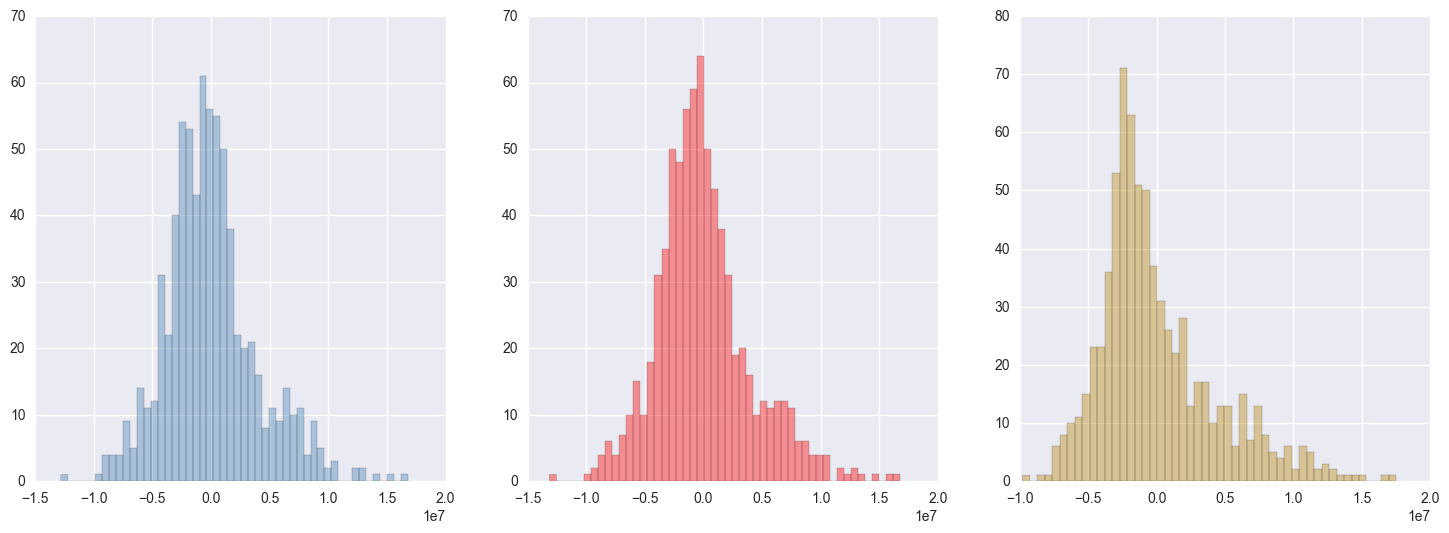

In [759]:
#training
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='red', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()

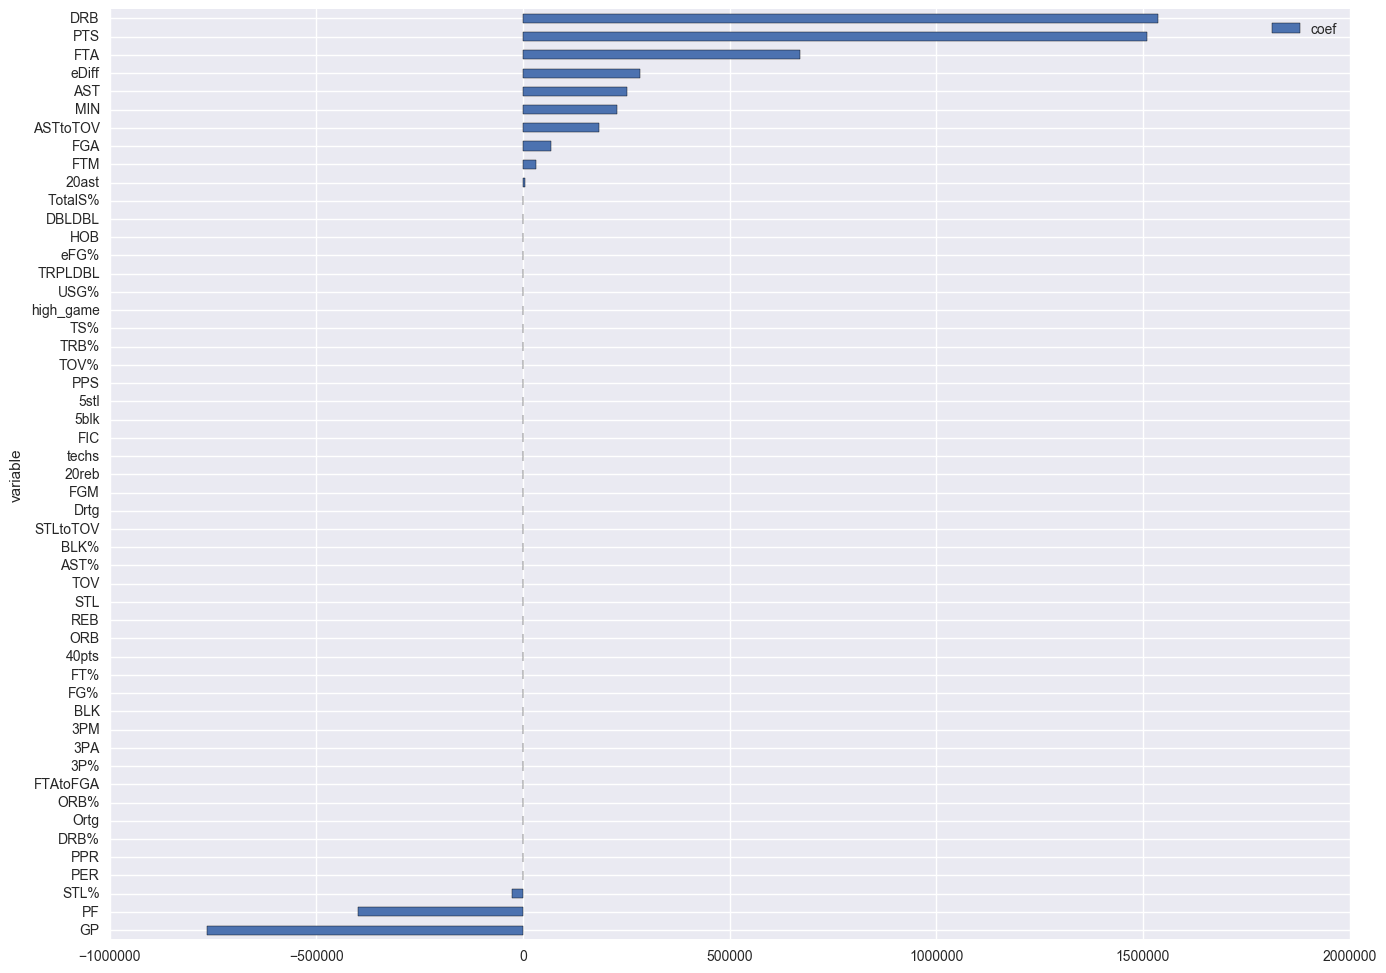

In [760]:
lasso_coefs.sort_values(by='coef').plot(kind='barh', x = 'variable', y = 'coef',figsize=(16,12))